In [75]:
#Imports
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
import keras.datasets.cifar10
import tensorflow as tf
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F

In [44]:
# Load cifar10 dataset, display sample images from each of the types

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

labels_map = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck",
}

print(labels_map.get(1))



automobile


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_75135/326278668.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels_map.get(int(y_train[i+10])))


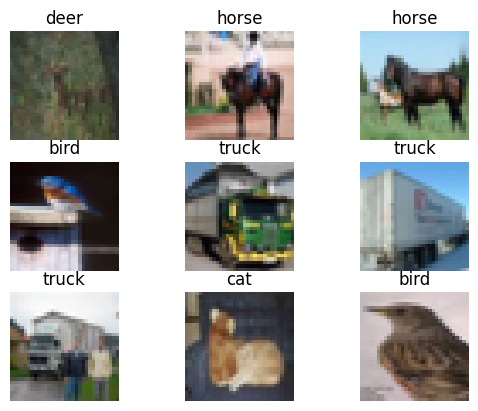

In [45]:
for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 
 plt.title(labels_map.get(int(y_train[i+10])))
 plt.axis("off")
 # plot raw pixel data
 plt.imshow(x_train[i+10])
# show the figure
plt.show()

torch.Size([15000, 32, 32, 3])
torch.Size([15000])
torch.Size([3000, 32, 32, 3])
torch.Size([3000])


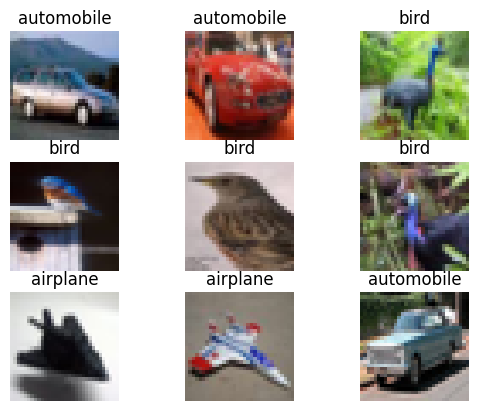

In [103]:
x_train_tensor = torch.from_numpy(x_train).float()/255
y_train_tensor = torch.from_numpy(y_train).squeeze()
x_test_tensor = torch.from_numpy(x_test).float()/255
y_test_tensor = torch.from_numpy(y_test).squeeze()


x_train_tensor = x_train_tensor[y_train_tensor < 3,:]
y_train_tensor = y_train_tensor[y_train_tensor < 3]

x_test_tensor = x_test_tensor[y_test_tensor < 3,:]
y_test_tensor = y_test_tensor[y_test_tensor < 3]

print(x_train_tensor.shape)
print(y_train_tensor.shape)
print(x_test_tensor.shape)
print(y_test_tensor.shape)

for i in range(9):
 # define subplot
 plt.subplot(330 + 1 + i)
 
 plt.title(labels_map.get(int(y_train_tensor[i])))
 plt.axis("off")
 # plot raw pixel data
 plt.imshow(x_train_tensor[i])
# show the figure

plt.show()


In [114]:
# put data into a dataset, split testing and training

dataset = torch.utils.data.TensorDataset(x_train_tensor,y_train_tensor) # create your datset

train_dataset, test_dataset = torch.utils.data.random_split(dataset,[0.8,0.2])
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=100, shuffle=True)

print(len(train_loader.dataset))
print(len(test_loader.dataset))
print(len(train_loader))
print(len(test_loader))


12000
3000
120
30


In [115]:
print(train_loader.dataset[2])

(tensor([[[0.6745, 0.7373, 0.9137],
         [0.6784, 0.7412, 0.9176],
         [0.6824, 0.7451, 0.9216],
         ...,
         [0.7059, 0.7373, 0.8863],
         [0.7059, 0.7333, 0.8863],
         [0.7059, 0.7373, 0.8863]],

        [[0.7333, 0.7608, 0.8980],
         [0.7373, 0.7608, 0.8980],
         [0.7373, 0.7647, 0.8980],
         ...,
         [0.8000, 0.7882, 0.8784],
         [0.8039, 0.7922, 0.8824],
         [0.8078, 0.7961, 0.8863]],

        [[0.8078, 0.8039, 0.9059],
         [0.8078, 0.8039, 0.9020],
         [0.8039, 0.8000, 0.8980],
         ...,
         [0.8902, 0.8667, 0.9255],
         [0.8902, 0.8627, 0.9216],
         [0.8902, 0.8627, 0.9216]],

        ...,

        [[0.4196, 0.4784, 0.6275],
         [0.4000, 0.4627, 0.6118],
         [0.3529, 0.4118, 0.5608],
         ...,
         [0.2039, 0.2667, 0.3961],
         [0.1922, 0.2549, 0.3804],
         [0.1843, 0.2471, 0.3765]],

        [[0.3255, 0.3882, 0.5255],
         [0.3373, 0.4000, 0.5373],
         [0

In [147]:
# Time to make the network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        # Input images are 32x32 pixels and have 3 channels (RGB)
        input_features = 32 * 32 * 3
        hidden_features = 512  # Number of neurons in the hidden layer
        output_features = 3   # Example: number of classes for classification

        # First fully connected layer
        self.fc1 = nn.Linear(input_features, hidden_features)
        # Second fully connected layer (output layer)
        self.fc2 = nn.Linear(hidden_features, output_features)

    def forward(self, x):
        # Flatten the image from [batch_size, 3, 32, 32] to [batch_size, 3072]
        x = x.reshape(x.size(0), -1)
        # Apply first fully connected layer and a ReLU activation
        x = F.relu(self.fc1(x))
        # Output layer
        x = F.softmax(self.fc2(x))
        return x

# Example usage
network = SimpleNN()
print(network)

# Dummy input (a batch of 5 images, each 32x32x3)
dummy_input = train_dataset[0:1][0]
print(dummy_input.shape)
output = network(dummy_input)
print(output)


SimpleNN(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
)
torch.Size([1, 32, 32, 3])
tensor([[0.3700, 0.2448, 0.3852]], grad_fn=<SoftmaxBackward0>)


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_75135/432335116.py:21: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [161]:
# make a NN with convolution layers

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)  # Output: (32, 32, 32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1) # Output: (32, 32, 64)
        self.pool = nn.MaxPool2d(2, 2)  # Output: (16, 16, 64)
        
        # Fully connected layers
        # After two pooling layers the image size is reduced to 8x8 (from 32x32)
        self.fc1 = nn.Linear(8 * 8 * 64, 512)
        self.fc2 = nn.Linear(512, 3)  # Assume 10 classes for classification

    def forward(self, x):
        x = x.permute(0, 3, 1, 2)  # Adjust the input dimensions
        # Apply first convolution layer followed by ReLU and pooling
        x = self.pool(F.relu(self.conv1(x)))
        # Apply second convolution layer followed by ReLU and pooling
        x = self.pool(F.relu(self.conv2(x)))
        
        # Flatten the image for the fully connected layer
        x = x.reshape(-1, 8 * 8 * 64)
        
        # Apply first fully connected layer and a ReLU activation
        x = F.relu(self.fc1(x))
        # Output layer
        x = F.softmax(self.fc2(x))
        return x

# Example usage
net = SimpleCNN()
print(net)

# Dummy input (a batch of 5 images, each 32x32x3)
dummy_input = torch.randn(5, 32, 32, 3)
output = net(dummy_input)
print(output)


SimpleCNN(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=4096, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=3, bias=True)
)
tensor([[0.3319, 0.3042, 0.3639],
        [0.3537, 0.3026, 0.3437],
        [0.3562, 0.2930, 0.3508],
        [0.3544, 0.2960, 0.3497],
        [0.3525, 0.3036, 0.3439]], grad_fn=<SoftmaxBackward0>)


/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_75135/4288239878.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


In [162]:
network = SimpleCNN()
# create the learning rule
optimizer = torch.optim.SGD(network.parameters(), 
                            lr=0.1,   # learning rate
                            momentum=0.5)

# variables to keep track of the training and testing accuracy
accuracy_train = []
accuracy_test = []

def continue_training():
    network.train()      # configure the network for training
    for i in range(10):  # train the network 10 times
        correct = 0
        for data, target in train_loader:       # working in batchs of 100
            
            optimizer.zero_grad()               # initialize the learning system
            output = network(data)              # feed in the data 
            loss = F.nll_loss(output, target)   # compute how wrong the output is
            loss.backward()                     # change the weights to reduce error
            optimizer.step()                    # update the learning rule
            
            pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
            correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of training accuracy values
    score = float(correct/len(train_loader.dataset))
    accuracy_train.append(score)
    print('Iteration', len(accuracy_train), 'Training accuracy:', score)
    
    correct = 0
    network.eval()
    for data, target in test_loader:    # go through the test data once (in groups of 1000)
        output = network(data)                               # feed in the data
        pred = output.data.max(1, keepdim=True)[1]           # compute which output is largest
        correct += pred.eq(target.data.view_as(pred)).sum()  # compute the number of correct outputs
    # update the list of testing accuracy values
    score = float(correct/len(test_loader.dataset))
    accuracy_test.append(score)
    print('Iteration', len(accuracy_test), 'Testing accuracy:', score)


In [163]:
import matplotlib.pyplot as plt
for i in range(10):
    continue_training()


plt.figure(figsize=(12,4))
plt.plot(accuracy_train, label='training')
plt.plot(accuracy_test, label='testing')
plt.legend()
plt.xlabel('training iterations')
plt.ylabel('accuracy')
plt.show()

/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_75135/4288239878.py:29: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(self.fc2(x))


Iteration 1 Training accuracy: 0.8107500076293945
Iteration 1 Testing accuracy: 0.8100000023841858
Iteration 2 Training accuracy: 0.8723333477973938
Iteration 2 Testing accuracy: 0.8493333458900452
Iteration 3 Training accuracy: 0.9124166369438171
Iteration 3 Testing accuracy: 0.8726666569709778
Iteration 4 Training accuracy: 0.9414166808128357
Iteration 4 Testing accuracy: 0.8673333525657654
Iteration 5 Training accuracy: 0.9558333158493042
Iteration 5 Testing accuracy: 0.8703333139419556
Iteration 6 Training accuracy: 0.9631666541099548
Iteration 6 Testing accuracy: 0.8863333463668823
Iteration 7 Training accuracy: 0.9649166464805603
Iteration 7 Testing accuracy: 0.8883333206176758


In [38]:
training_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print(training_data.take(1))

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data.take(1)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

<_TakeDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>


2024-04-17 21:38:21.054726: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


ValueError: not enough values to unpack (expected 2, got 1)

<Figure size 800x800 with 0 Axes>

/var/folders/hq/s3066fpx10g_0v092z_46v8h0000gn/T/ipykernel_75135/326278668.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(labels_map.get(int(y_train[i+10])))


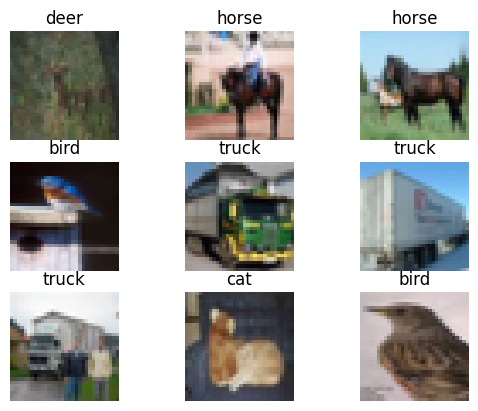

(50000, 1)
(50000, 32, 32, 3)
1
5000
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


<Figure size 640x480 with 0 Axes>

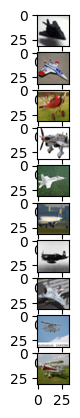

In [64]:
# split up my data based on category

indices = np.where(y_train == 0)

print(y_train.shape)
print(x_train.shape)
#binary_imgs = binary_imgs[y_train < 3,:]
indices = [y_train==0]
print(len(indices))
x_train_0 = [x_train[i] for i in range(len(x_train)) if y_train[i] == 0]


print(len(x_train_0))
print(x_train[0])


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(10,1) 

for i in range(10):
    
    axarr[i].imshow(x_train_0[i])
   
plt.show()



For this part, I need to make a network that identifies 3 categories out of the 10, for the training set I'll use:
Frog, Car, and Plane

In [46]:
print(groups[0])

[0 0 0 ... 0 0 0]


In [24]:

rand_img = trainset[10]

print(rand_img)

def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    

def show_sample_images(trainloader):
    # get some random training images
    dataiter = iter(trainloader)
    images, labels = next(dataiter)

    # show images
    imshow(torchvision.utils.make_grid(images))

#show_sample_images(trainloader)

npimg = rand_img.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
plt.show()



(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FBD4177BFA0>, 4)


AttributeError: 'tuple' object has no attribute 'numpy'